In [554]:
import gensim
import zipfile
import wget
from pylab import rcParams
from math import log
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
with zipfle.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [563]:
rcParams['figure.figsize'] = 7,7

In [566]:
def similar_graph(word, model, n):
    words = []
    nodelist = []
    if word in model:
        for i in model.most_similar(positive=[word], topn=n):
            dist = log(i[1])*((-10)+2)
            tup = (word, i[0], dist)
            words.append(tup)
            nodelist.append(i[0])
    my_graph = nx.Graph()
    my_graph.add_weighted_edges_from(words)
    #nx.local_reaching_centrality(my_graph, word, weight='weight')
    pos=nx.spring_layout(my_graph, k=1, scale=2, iterations=100)
    nx.draw(my_graph, pos, with_labels = True)
    nx.draw_networkx_nodes(my_graph,pos,
                       nodelist=[word],
                       node_color='#f26f6f',
                       node_size=600)
    nx.draw_networkx_nodes(my_graph,pos,
                       nodelist=nodelist,
                       node_color='#A0CBE2',
                       node_size=300)
    nx.draw_networkx_edges(my_graph,pos,
                       edgelist=words,
                       width=4,alpha=0.5,edge_color='#ed9797')

    
    a = plt.show()
    plt.savefig('labels.png')
    return a


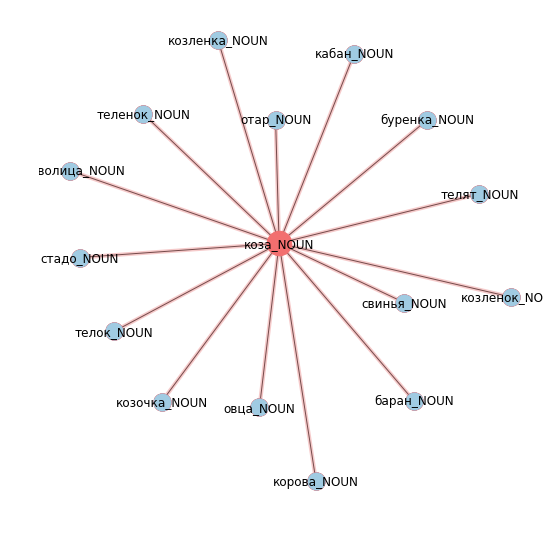

<Figure size 504x504 with 0 Axes>

In [568]:
similar_graph('коза_NOUN', model, 15)